In [27]:
import numpy as np
import matplotlib.pyplot as plt

In [28]:
v_s = 4 
g1 = 1.0
g2 = 1.0
g3 = 1/0.5
g4 = 1/0.2
I_sat = 1e-12 # Reverse Saturation Current
q = 1.6e-19 # Charge on an electron
eta = 1 # non-ideality factor
K = 1.38e-23 # Boltzman's Constant
T = 300 # Absolute Temperature

v_t = (K*T)/q

vd0 = 0.5 # initial guess


In [29]:
def diode_current(v_d):
    return I_sat*(np.exp(v_d/(eta*v_t)) -1)

def newton_raphson(init_val, V_S, err = 1e-6, iter = 10000):
    vd = init_val
    vds = list()
    i_ds = list()
    for i in range(iter):
        vds.append(vd)
        i_d = diode_current(vd) - vd*(I_sat/(eta*v_t))*(np.exp(vd/(eta*v_t)))
        gd = (I_sat/(eta*v_t))*(np.exp(vd/(eta*v_t)))
        G = np.matrix([[g1, -g1, 0, 1], [-g1, g1+g2+g3+gd, -g3, 0], [0, -g3, g3+g4, 0], [1, 0, 0, 0]])
        b = np.matrix([0, -i_d, 0, V_S]).T
        x = np.linalg.solve(G,b)
        vd_new = float(x[1])
        
        if abs(vd - vd_new) <= err:
            return float(b[1])
            #return x, i, vds, i_ds
        vd = vd_new
    return "Failed to Converge in spsecified iteration"

In [37]:
i_dd = list()
for v in np.arange(0,4.01,0.01):
    
    i_dd.append(newton_raphson(vd0, v))

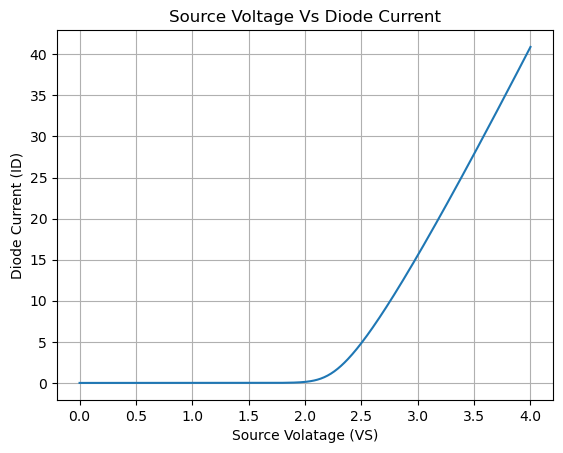

In [40]:
plt.plot(np.arange(0,4.01,0.01), i_dd)
plt.title("Source Voltage Vs Diode Current")
plt.xlabel('Source Volatage (VS)')
plt.ylabel("Diode Current (ID)")
plt.grid(True)
plt.show()

In [41]:
x, i , vds, i_ds = newton_raphson(vd0)

print("****************************************************************")
print("Voltage at Node 1 (V1): " + str(round(float(x[0]), 3)) + " Volts")
print("Voltage at Node 2 (V2): " + str(round(float(x[1]), 3)) + " Volts")
print("Voltage at Node 3 (V3): " + str(round(float(x[2]), 3)) + " Volts")
print("Source Current    (Is): " + str(round(float(x[3]), 3)) + " Ampere")
print("****************************************************************")
it = range(i+1) #np.arange(1,i+2, 1)
plt.figure()
plt.plot(it, vds)
plt.title("Iteration VS Voltage")
plt.xlabel('Number of Iteration')
plt.ylabel("Diode Voltage or Voltage at Node 2")
plt.grid(True)
plt.show()


TypeError: newton_raphson() missing 1 required positional argument: 'V_S'

In [ ]:
'''
Vd_values = np.linspace(0.0, 1, 100)
Id_values = [diode_current(Vd) for Vd in Vd_values]
id_linear = [diode_current(v) for v in vds]
plt.plot(Vd_values, Id_values, label = "Diode Non linear character")
plt.plot(vds,id_linear, label = "DIode Linearlized")
plt.legend()'''

'\nVd_values = np.linspace(0.0, 1, 100)\nId_values = [diode_current(Vd) for Vd in Vd_values]\nid_linear = [diode_current(v) for v in vds]\nplt.plot(Vd_values, Id_values, label = "Diode Non linear character")\nplt.plot(vds,id_linear, label = "DIode Linearlized")\nplt.legend()'

In [ ]:
np.arange(0, 4.1, 0.1)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. ])